Import Library yang dibutuhkan

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

Membaca Data Set

In [5]:
df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data Preparation 

In [6]:
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)': 'Score'
}, inplace=True)

In [13]:
x = df.drop(['CustomerID', 'Gender'], axis=1)

print(x)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


In [14]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Menentukan jumlah Cluster dengan Elbow

Text(5, 150000, 'Possible Elbow Point')

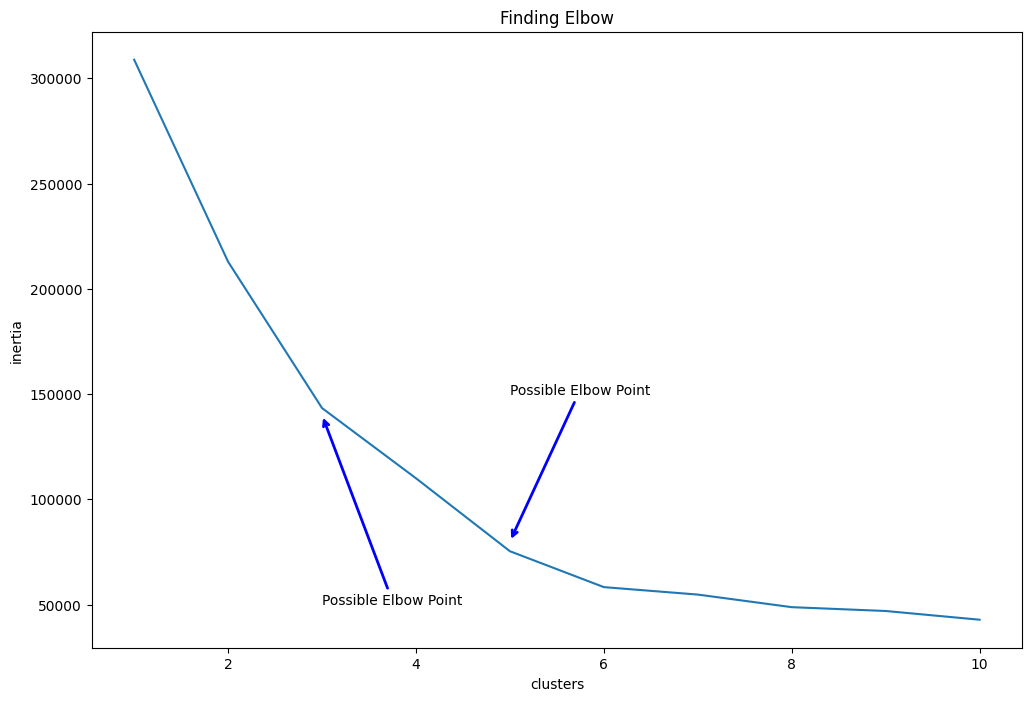

In [23]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)

ax.set_title('Finding Elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')


# Panah Elbow
ax.annotate("Possible Elbow Point", xy=(3, 140000), xytext=(3,50000), xycoords='data', 
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2 ))

ax.annotate("Possible Elbow Point", xy=(5, 80000), xytext=(5,150000), xycoords='data', 
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2 ))

Proses Clustering

In [26]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(x)
x['Labels'] = kmean.labels_

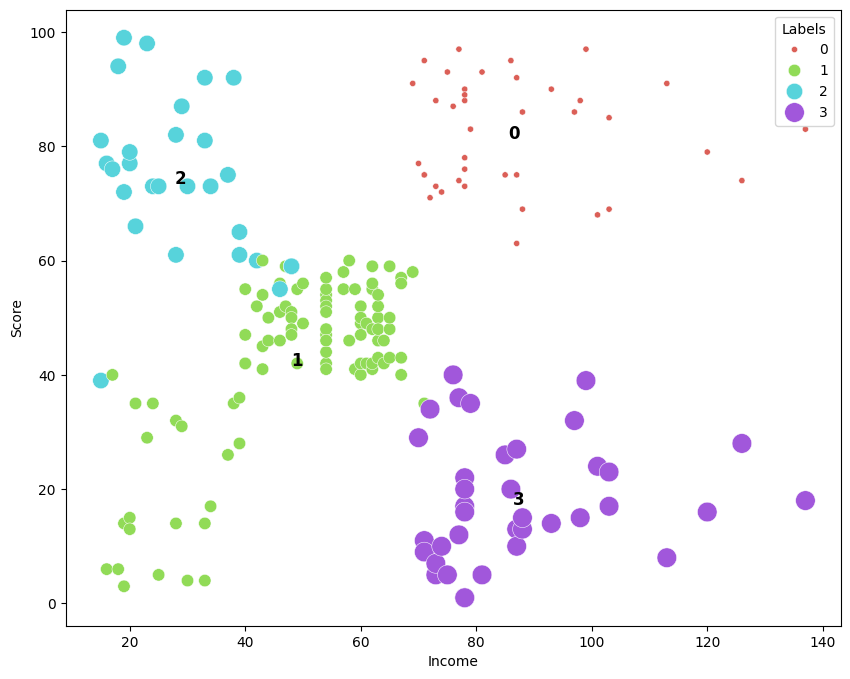

In [28]:
plt.figure(figsize=(10,8))
 #sns.scatterplot(x['Income'], x['Score'], hue=x['Labels'], markers=True, size=x['Labels'],
                #palette=sns.color_palette('hls', n_clust))

#for label in x['Labels']:
    #plt.annotate(label, 
                 #(x[x['Labels']==label]['Income'].mean(),
                 #x[x['Labels']==label]['Score'].mean()),
                  #horizontalalignment = 'center',
                    #verticalalignment = 'center',
                    # size = 20, weight = 'bold',
                     # color = 'black' )
                     # Membuat scatterplot dengan hue untuk label, size berdasarkan label, dan palet warna
sns.scatterplot(x='Income', y='Score', hue='Labels', size='Labels', 
                data=x, palette=sns.color_palette('hls', n_clust), sizes=(20, 200))

# Loop untuk menambahkan anotasi pada setiap label
for label in x['Labels'].unique():
    plt.annotate(
        label, 
        (x[x['Labels'] == label]['Income'].mean(), 
         x[x['Labels'] == label]['Score'].mean()),
        horizontalalignment='center', verticalalignment='center',
        size=12, weight='bold', color='black'
    )

# Menampilkan plot
plt.show()

In [29]:
print(x)

     Age  Income  Score  Labels
0     19      15     39       2
1     21      15     81       2
2     20      16      6       1
3     23      16     77       2
4     31      17     40       1
..   ...     ...    ...     ...
195   35     120     79       0
196   45     126     28       3
197   32     126     74       0
198   32     137     18       3
199   30     137     83       0

[200 rows x 4 columns]


In [32]:
x.to_excel("output_clustering_cust_segmentation.xlsx")